In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import matplotlib.cm as cm
import os

Estimated heat transfer coefficient h ≈ 1498.75 W/m²·K


/var/folders/h_/r3lv2bc576qbm4jbyp94hfxr0000gn/T/ipykernel_3472/1769741968.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('GnBu')


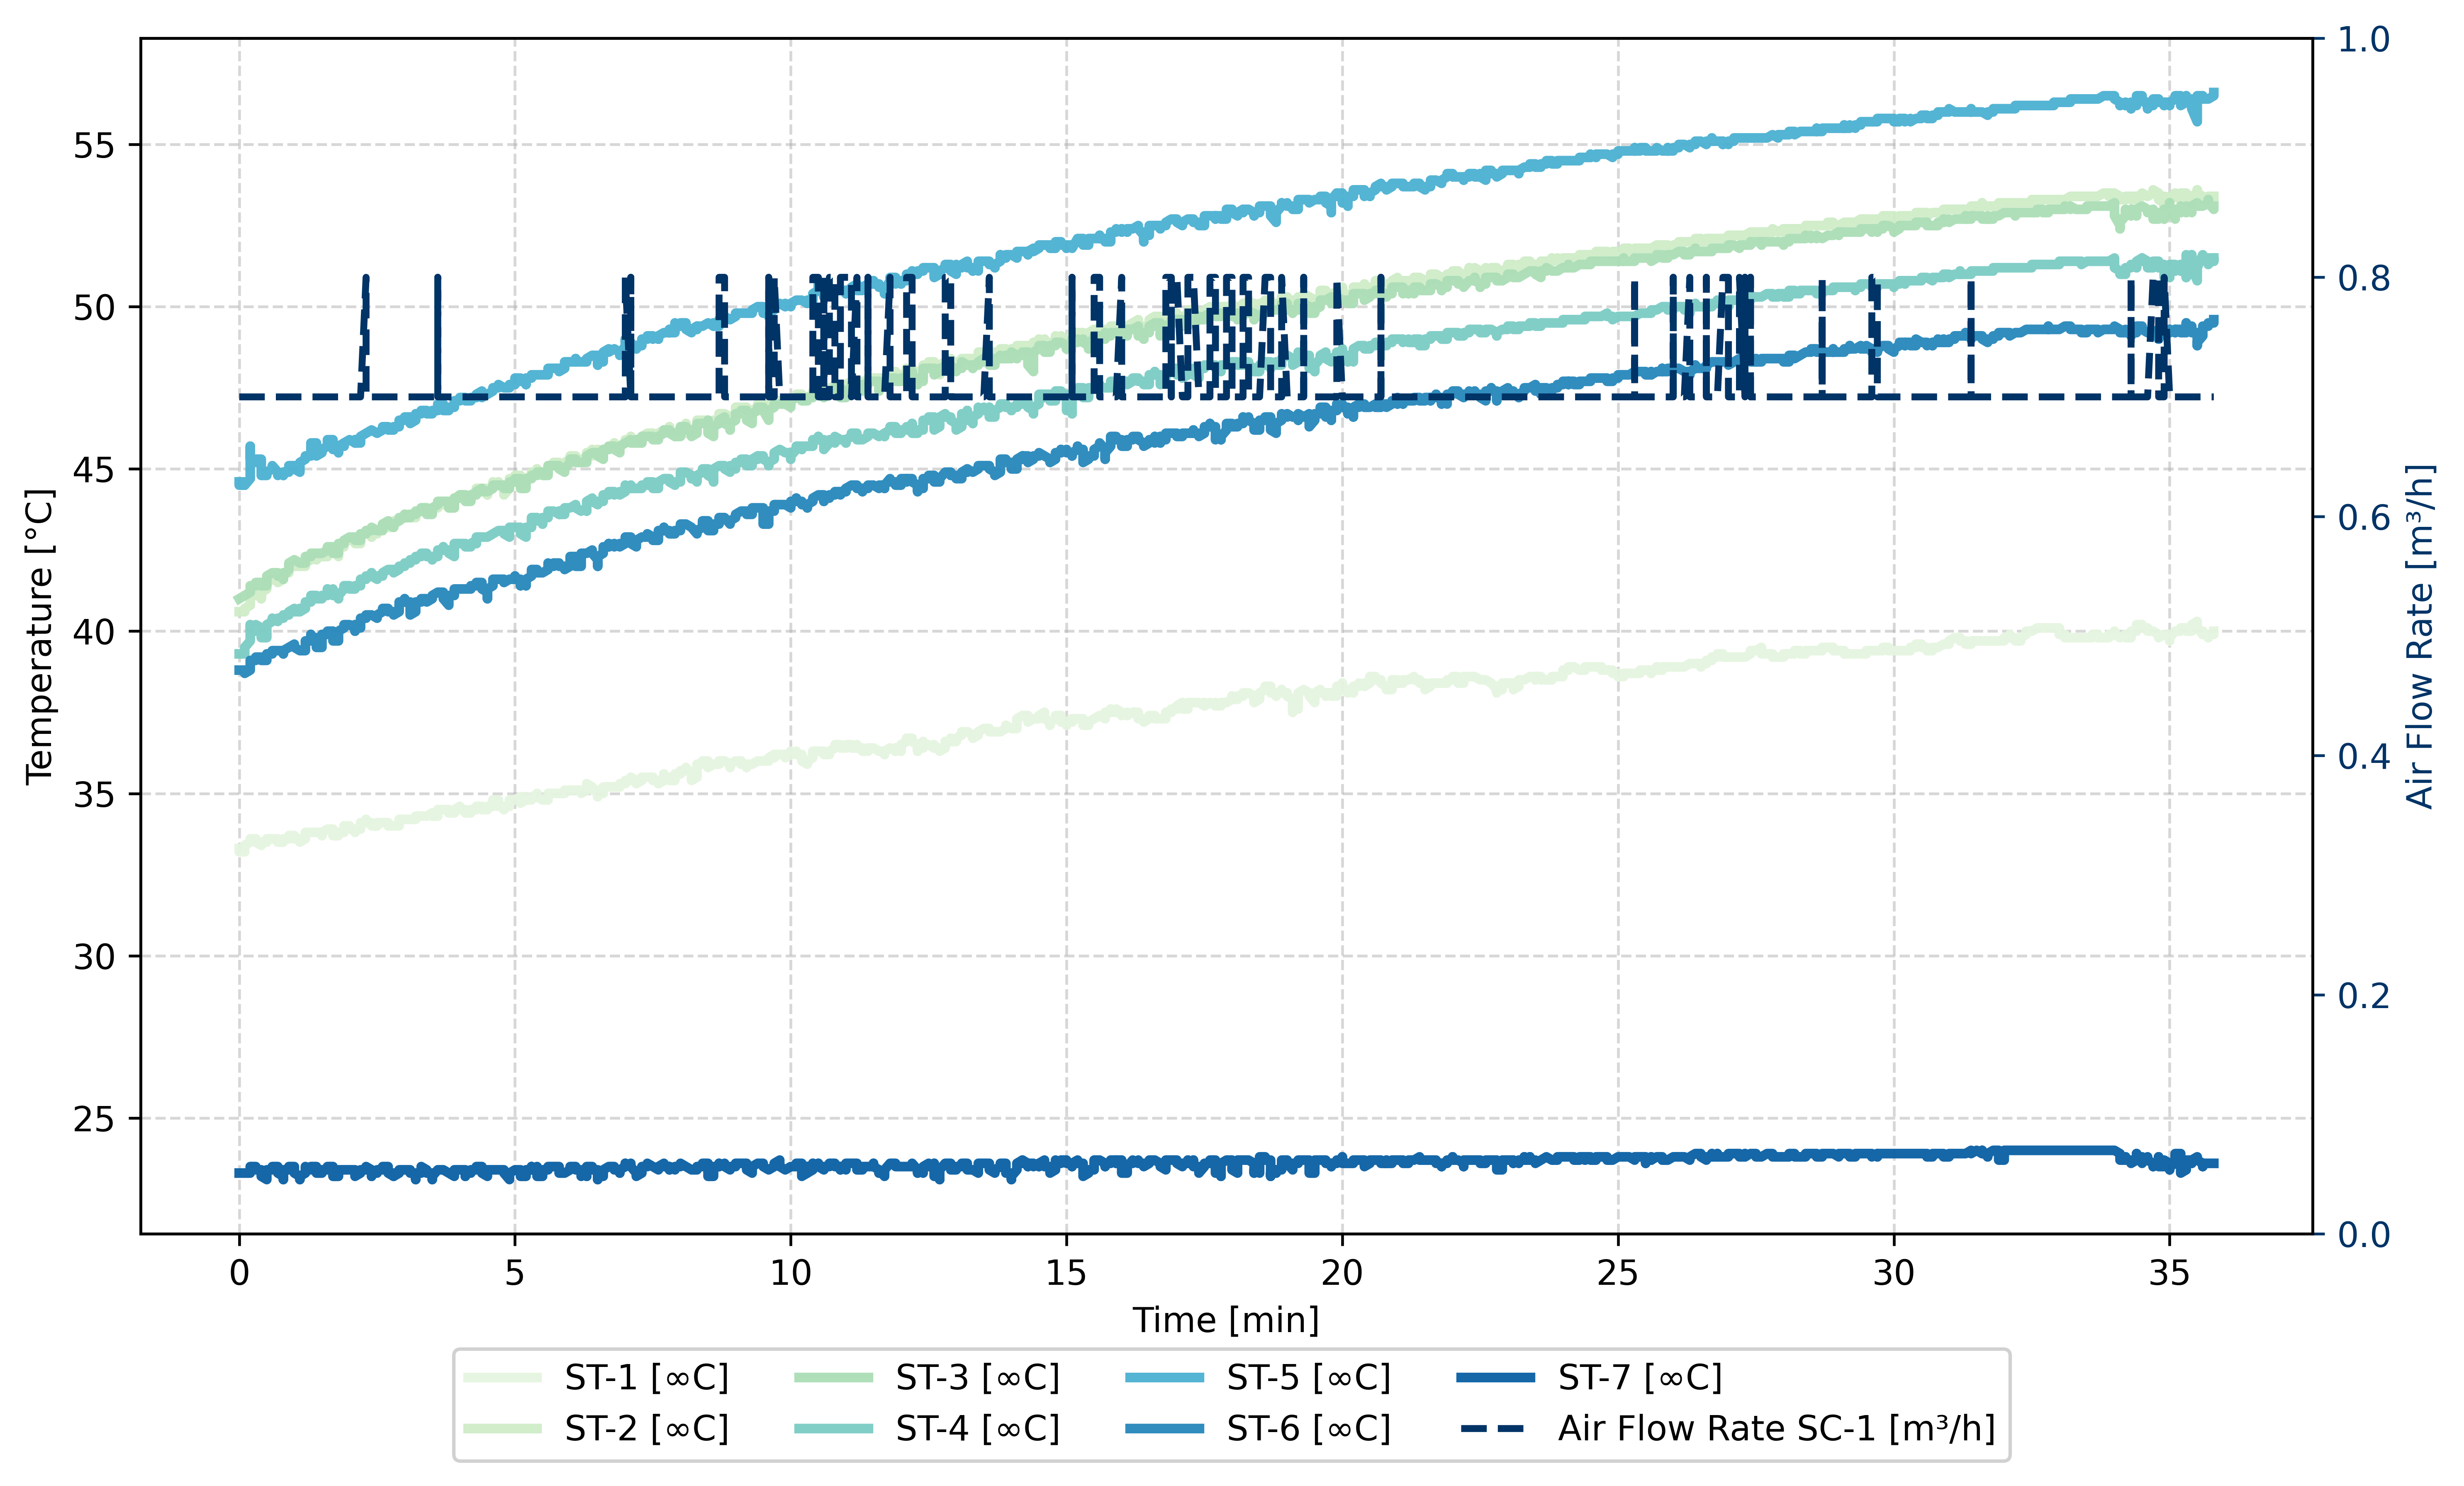

In [85]:


# === 1. Load Excel Data and Clean ===
file_path = '/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 8 /Data TP8.xlsx'
sheet_name = 'fan 25'

df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=1)
df.columns = df.columns.str.strip()

# Replace commas with dots and convert columns to numeric
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

# === 2. Prepare data ===
time = df['time [min.]']
temp_cols = ['ST-1 [∞C]', 'ST-2 [∞C]', 'ST-3 [∞C]', 'ST-4 [∞C]', 'ST-5 [∞C]', 'ST-6 [∞C]', 'ST-7 [∞C]']

# Convert SC-1 to float (important for plotting)
df['SC-1 [m3/h]'] = df['SC-1 [m3/h]'].astype(str).str.replace(',', '.').astype(float)

# === 3. Calculate heat transfer coefficient h ===
k = 210    # W/m·K (aluminum)
B = 0.001  # m, half-thickness of the fin
L = 0.013  # m, total length of the fin
z = 0.0126 # m, measurement location

T_w = df['ST-cont [∞C]'].mean()
T_inf = df['ST-1 [∞C]'].mean()
T_z = df['ST-2 [∞C]'].mean()

Theta_z = (T_z - T_inf) / (T_w - T_inf)
zeta = z / L

def fin_eq(N):
    return np.cosh(N * (1 - zeta)) - Theta_z * np.cosh(N)

N_guess = 1.0
N_solution = fsolve(fin_eq, N_guess)[0]

h = (N_solution**2) * k * B / (L**2)
print(f"Estimated heat transfer coefficient h ≈ {h:.2f} W/m²·K")

# === 4. Plot with green-to-blue gradient and airflow ===
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=600)

# Color map for temperature sensors
cmap = cm.get_cmap('GnBu')
colors = cmap(np.linspace(0.1, 0.9, len(temp_cols)))

# Plot temperature sensors
for col, color in zip(temp_cols, colors):
    ax1.plot(time, df[col], label=col, color=color, linewidth=2.8, alpha=0.95)

ax1.set_xlabel('Time [min]')
ax1.set_ylabel('Temperature [°C]')
ax1.grid(True, linestyle='--', alpha=0.5)

# Plot airflow on secondary axis
ax2 = ax1.twinx()
airflow_color = "#003366"
ax2.plot(time, df['SC-1 [m3/h]'], label='Air Flow Rate SC-1 [m³/h]', color=airflow_color,
         linestyle='--', linewidth=2)
ax2.set_ylabel('Air Flow Rate [m³/h]', color=airflow_color)
ax2.tick_params(axis='y', colors=airflow_color)
ax2.set_ylim(0, max(df['SC-1 [m3/h]'].max() * 1.1, 1))

# === Combine legends and place below plot ===
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

fig.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.1),
    ncol=4,
    framealpha=0.9
)

plt.tight_layout(rect=[0, 0.07, 1, 1])  # Add space at bottom for legend

# === Save and show plot ===
save_path = os.path.join('/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 8 ', "fan25.png")
plt.savefig(save_path, format='png', bbox_inches='tight')
plt.show()

Estimated heat transfer coefficient h ≈ 3644.54 W/m²·K


/var/folders/h_/r3lv2bc576qbm4jbyp94hfxr0000gn/T/ipykernel_3472/282907301.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('GnBu')


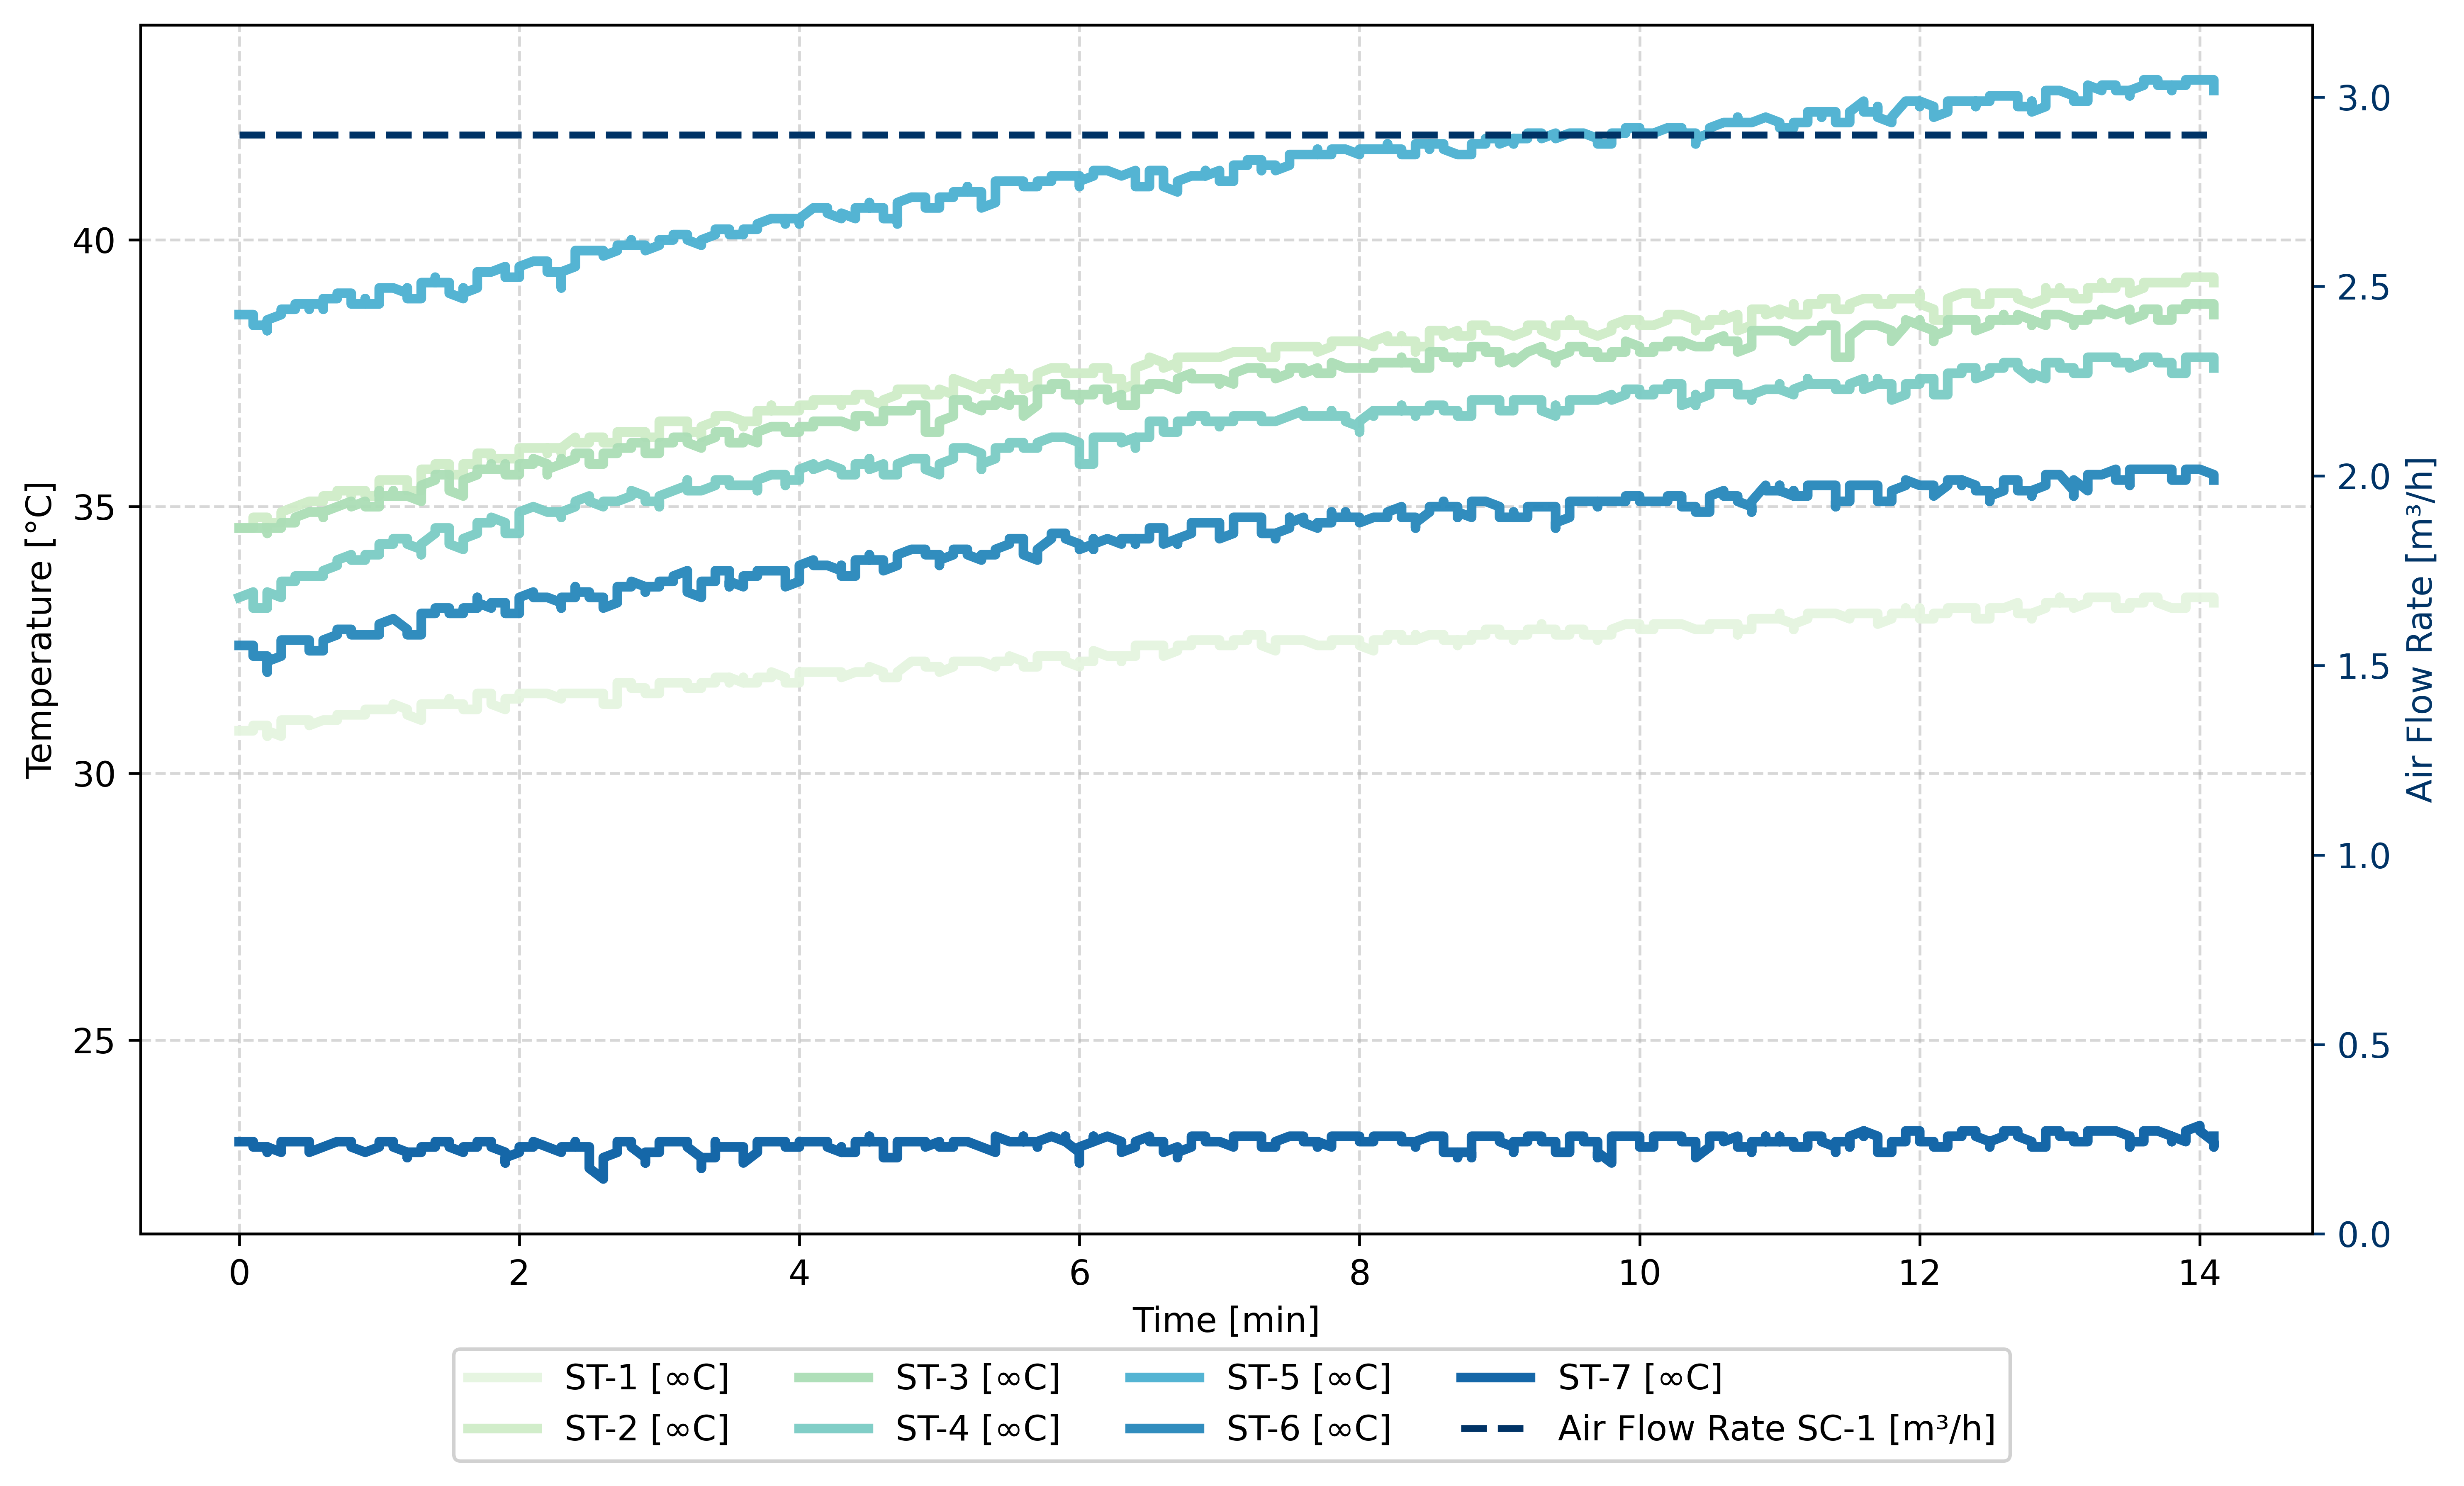

In [86]:


# === 1. Load Excel Data and Clean ===
file_path = '/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 8 /Data TP8.xlsx'
sheet_name = 'fan 50'

df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=1)
df.columns = df.columns.str.strip()

# Replace commas with dots and convert columns to numeric
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

# === 2. Prepare data ===
time = df['time [min.]']
temp_cols = ['ST-1 [∞C]', 'ST-2 [∞C]', 'ST-3 [∞C]', 'ST-4 [∞C]', 'ST-5 [∞C]', 'ST-6 [∞C]', 'ST-7 [∞C]']

# Convert SC-1 to float (important for plotting)
df['SC-1 [m3/h]'] = df['SC-1 [m3/h]'].astype(str).str.replace(',', '.').astype(float)

# === 3. Calculate heat transfer coefficient h ===
k = 210    # W/m·K (aluminum)
B = 0.001  # m, half-thickness of the fin
L = 0.013  # m, total length of the fin
z = 0.0126 # m, measurement location

T_w = df['ST-cont [∞C]'].mean()
T_inf = df['ST-1 [∞C]'].mean()
T_z = df['ST-2 [∞C]'].mean()

Theta_z = (T_z - T_inf) / (T_w - T_inf)
zeta = z / L

def fin_eq(N):
    return np.cosh(N * (1 - zeta)) - Theta_z * np.cosh(N)

N_guess = 1.0
N_solution = fsolve(fin_eq, N_guess)[0]

h = (N_solution**2) * k * B / (L**2)
print(f"Estimated heat transfer coefficient h ≈ {h:.2f} W/m²·K")

# === 4. Plot with green-to-blue gradient and airflow ===
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=600)

# Color map for temperature sensors
cmap = cm.get_cmap('GnBu')
colors = cmap(np.linspace(0.1, 0.9, len(temp_cols)))

# Plot temperature sensors
for col, color in zip(temp_cols, colors):
    ax1.plot(time, df[col], label=col, color=color, linewidth=2.8, alpha=0.95)

ax1.set_xlabel('Time [min]')
ax1.set_ylabel('Temperature [°C]')
ax1.grid(True, linestyle='--', alpha=0.5)

# Plot airflow on secondary axis
ax2 = ax1.twinx()
airflow_color = "#003366"
ax2.plot(time, df['SC-1 [m3/h]'], label='Air Flow Rate SC-1 [m³/h]', color=airflow_color,
         linestyle='--', linewidth=2)
ax2.set_ylabel('Air Flow Rate [m³/h]', color=airflow_color)
ax2.tick_params(axis='y', colors=airflow_color)
ax2.set_ylim(0, max(df['SC-1 [m3/h]'].max() * 1.1, 1))

# === Combine legends and place below plot ===
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

fig.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.1),
    ncol=4,
    framealpha=0.9
)


plt.tight_layout(rect=[0, 0.07, 1, 1])  # Add space at bottom for legend

# === Save and show plot ===
save_path = os.path.join('/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 8 ', "fan50.png")
plt.savefig(save_path, format='png', bbox_inches='tight')
plt.show()

Estimated heat transfer coefficient h ≈ 7075.40 W/m²·K


/var/folders/h_/r3lv2bc576qbm4jbyp94hfxr0000gn/T/ipykernel_3472/134421899.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('GnBu')


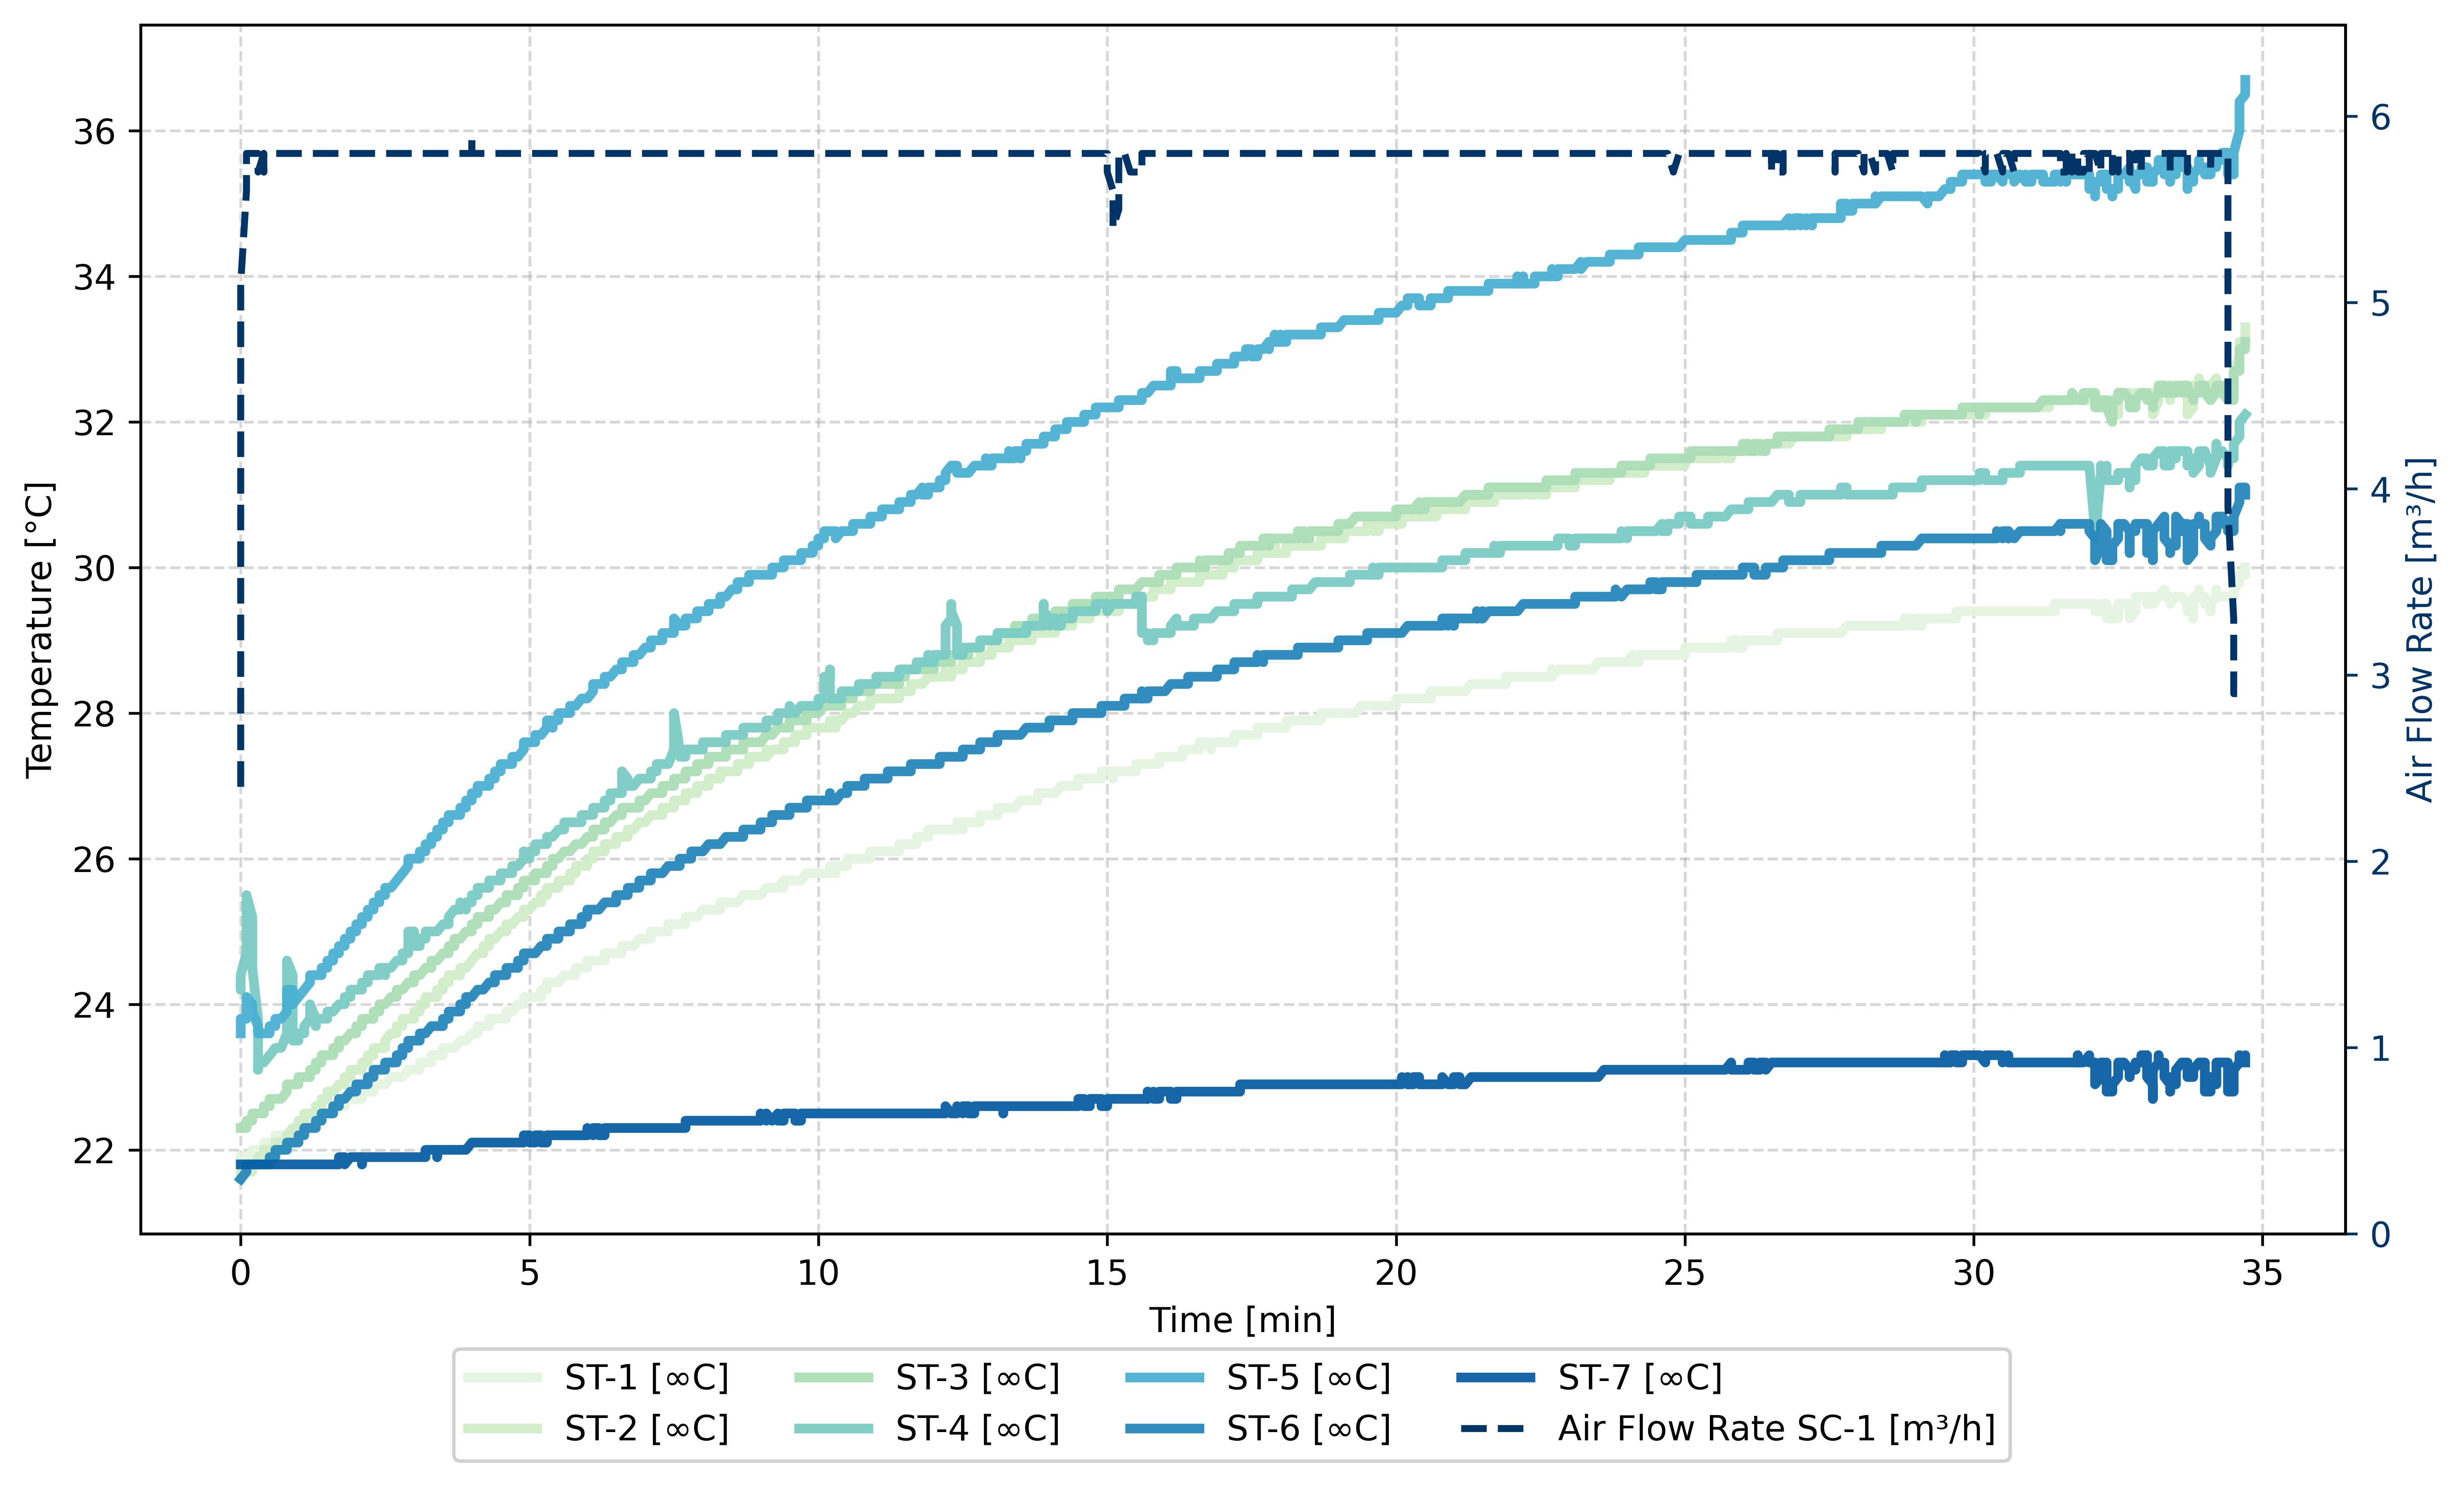

In [87]:
# === 1. Load Excel Data and Clean ===
file_path = '/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 8 /Data TP8.xlsx'
sheet_name = 'fan 75'

df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=1)
df.columns = df.columns.str.strip()

# Replace commas with dots and convert to numeric
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

# === 2. Prepare data ===
time = df['time [min.]']
temp_cols = ['ST-1 [∞C]', 'ST-2 [∞C]', 'ST-3 [∞C]', 'ST-4 [∞C]', 'ST-5 [∞C]', 'ST-6 [∞C]', 'ST-7 [∞C]']

# Convert airflow to float
df['SC-1 [m3/h]'] = df['SC-1 [m3/h]'].astype(str).str.replace(',', '.').astype(float)

# === 3. Calculate heat transfer coefficient h ===
k = 210    # W/m·K (aluminum)
B = 0.001  # m, half-thickness of the fin
L = 0.013  # m, total length of the fin
z = 0.0126 # m, measurement location

T_w = df['ST-cont [∞C]'].mean()
T_inf = df['ST-1 [∞C]'].mean()
T_z = df['ST-2 [∞C]'].mean()

Theta_z = (T_z - T_inf) / (T_w - T_inf)
zeta = z / L

def fin_eq(N):
    return np.cosh(N * (1 - zeta)) - Theta_z * np.cosh(N)

N_guess = 1.0
N_solution = fsolve(fin_eq, N_guess)[0]

h = (N_solution**2) * k * B / (L**2)
print(f"Estimated heat transfer coefficient h ≈ {h:.2f} W/m²·K")

# === 4. Plot with green-to-blue gradient and airflow ===
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=600)

# Color map for temperature sensors
cmap = cm.get_cmap('GnBu')
colors = cmap(np.linspace(0.1, 0.9, len(temp_cols)))

# Plot temperature sensors
for col, color in zip(temp_cols, colors):
    ax1.plot(time, df[col], label=col, color=color, linewidth=2.8, alpha=0.95)

ax1.set_xlabel('Time [min]')
ax1.set_ylabel('Temperature [°C]')
ax1.grid(True, linestyle='--', alpha=0.5)

# Plot airflow on secondary axis
ax2 = ax1.twinx()
airflow_color = "#003366"
ax2.plot(time, df['SC-1 [m3/h]'], label='Air Flow Rate SC-1 [m³/h]', color=airflow_color,
         linestyle='--', linewidth=2)
ax2.set_ylabel('Air Flow Rate [m³/h]', color=airflow_color)
ax2.tick_params(axis='y', colors=airflow_color)
ax2.set_ylim(0, max(df['SC-1 [m3/h]'].max() * 1.1, 1))

# === Combine legends and place below plot ===
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

fig.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.1),
    ncol=4,
    framealpha=0.9
)

plt.tight_layout(rect=[0, 0.07, 1, 1])  # Add space at bottom for legend

# === Save and show plot ===
save_path = os.path.join('/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 8 ', "fan75.png")
plt.savefig(save_path, format='png', bbox_inches='tight')
plt.show()
